In [1]:
sns.set()
%matplotlib inline

In [2]:
# EDA 용 데어터 셋
hp_train = pd.read_csv('./train.csv')
hp_test = pd.read_csv('./test.csv')

In [3]:
# feature engineering 용 데이터 셋 
hp_train2 = pd.read_csv('./train.csv')
hp_test2 = pd.read_csv('./test.csv')

### 1) 도메인 지식 활용한 독립변수 찾기 
* 1-1) 부동산 가격에 영향을 미치는 대표적 요소 확인 [real estate](http://www.zevizoproperties.com/blog/property-selling/11-essential-factors-that-affect-property-value/)

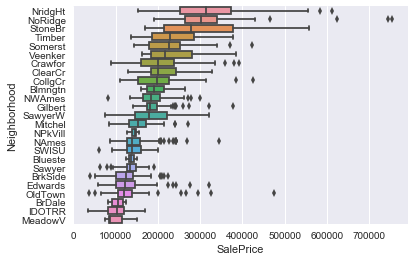

In [4]:
# 1-1-1) Neighborhood
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Location' 에 해당하는 Neighborhood 칼럼을 
# median 값 순으로 나열하여 선형성과 상관관계를 확인한다. (0.71)
order = hp_train.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False)
sns.boxplot(hp_train.SalePrice, hp_train.Neighborhood, order=order.index)

In [5]:
def order_Neighbor(x):
    '''the most high median price of Neighborhood level sets 24, the lowest 0'''
    if x == 'NridgHt':
        return 24
    elif x == 'NoRidge':
        return 23
    elif x == 'StoneBr':
        return 22
    elif x == 'Timber':
        return 21
    elif x == 'Somerst':
        return 20
    elif x == 'Veenker':
        return 19
    elif x == 'Crawfor':
        return 18
    elif x == 'ClearCr':
        return 17
    elif x == 'CollgCr':
        return 16
    elif x == 'Blmngtn':
        return 15
    elif x == 'NWAmes':
        return 14
    elif x == 'Gilbert':
        return 13
    elif x == 'SawyerW':
        return 12
    elif x == 'Mitchel':
        return 11
    elif x == 'NPkVill':
        return 10
    elif x == 'NAmes':
        return 9
    elif x == 'SWISU':
        return 8
    elif x == 'Blueste':
        return 7
    elif x == 'Sawyer':
        return 6
    elif x == 'BrkSide':
        return 5
    elif x == 'Edwards':
        return 4
    elif x == 'OldTown':
        return 3
    elif x == 'BrDale':
        return 2
    elif x == 'IDOTRR':
        return 1
    elif x == 'MeadowV':
        return 0
    
    
hp_train['Ordered_Num_Neighborhood'] = hp_train['Neighborhood'].apply(order_Neighbor)

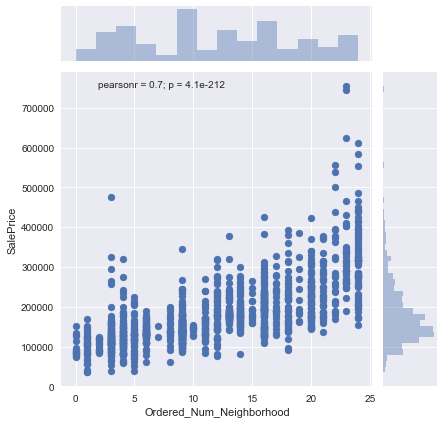

In [6]:
sns.jointplot(x='Ordered_Num_Neighborhood', y='SalePrice', data=hp_train)

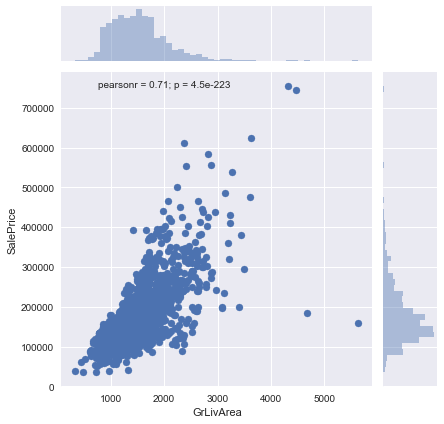

In [7]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=hp_train)

In [8]:
# 1-1-2) TotalFlrSF
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Size' 를 확인하기 위해  
# 1stFlrSF 와 2ndFlrSF 를 결합한 TotalFlrSF 칼럼을 새로 만든후 선형성과 상관관계를 확인한다. (0.72)
hp_train['TotalFlrSF'] = hp_train['1stFlrSF'] + hp_train['2ndFlrSF']

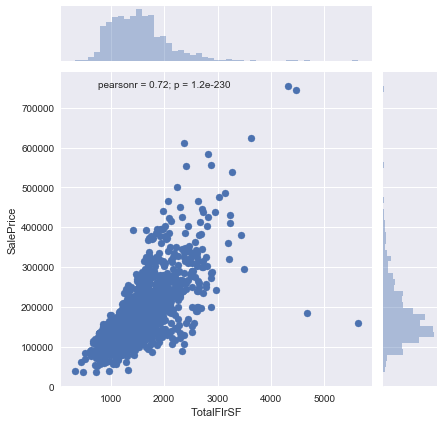

In [9]:
sns.jointplot(x='TotalFlrSF', y='SalePrice', data=hp_train)

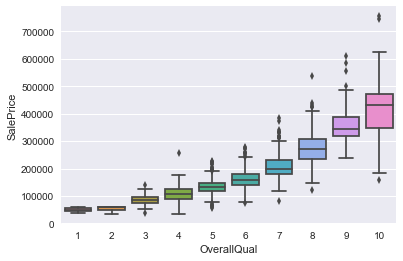

In [10]:
# 1-1-3) Condition 
# 집값에 가장 큰 영향을 주는 요소 중 하나인 'Condition' 을 확인하기 위해  
# OveralQual의 선형성과 상관관계를 확인한다. (0.79)
sns.boxplot(x='OverallQual', y='SalePrice',data=hp_train)

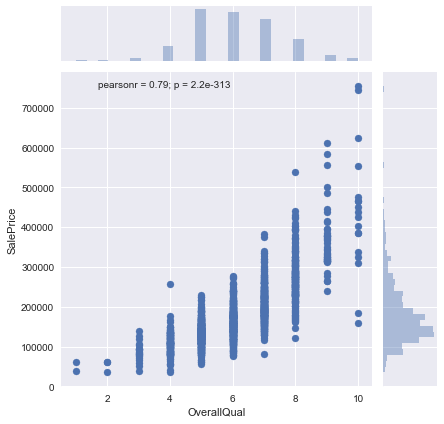

In [11]:
sns.jointplot(x='OverallQual', y='SalePrice', data=hp_train)

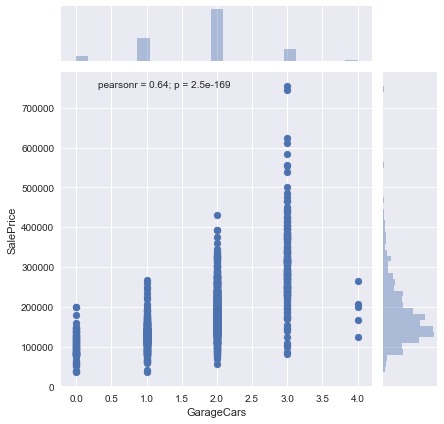

In [12]:
#1-1-4) 'GarageCars'
# GarageCars의 선형성과 상관관계를 확인한다. (0.64)
sns.jointplot(x='GarageCars', y='SalePrice', data=hp_train)

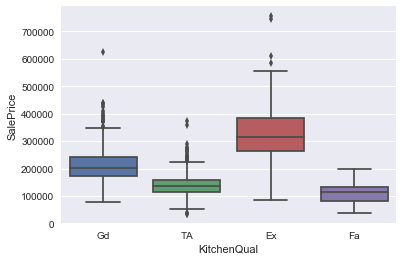

In [13]:
#1-1-5) 'KitchenQual'
# KitchenQual 선형성과 상관관계를 확인한다. (0.66)
sns.boxplot(x='KitchenQual', y='SalePrice', data=hp_train)

In [14]:
def fkq(col):
    if col == 'Ex':
        return 4
    elif col == 'Gd':
        return 3
    elif col == 'TA':
        return 2
    elif col == 'Fa':
        return 1
    elif col == 'Po':
        return 0

hp_train['Num_KitchenQual'] = hp_train['KitchenQual'].apply(fkq)

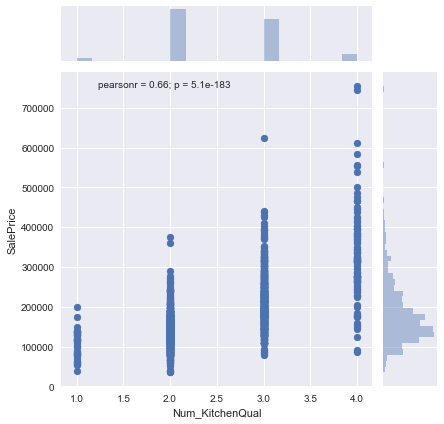

In [15]:
sns.jointplot(x='Num_KitchenQual', y='SalePrice', data=hp_train)

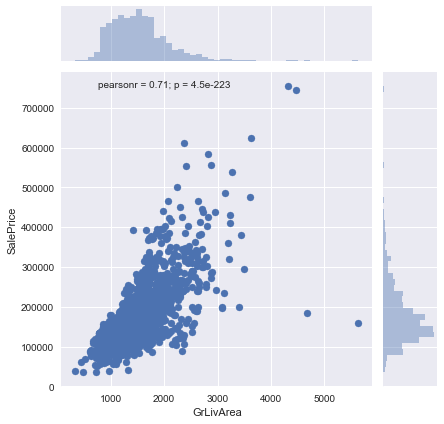

In [16]:
#1-1-6) 'GrLivArea'
# Random Forest 결과로 중요 feature 상위에 랭크된 GrLivArea 선형성과 상관관계를 확인한다. (0.71)
sns.jointplot(x='GrLivArea', y='SalePrice', data=hp_train)

### 2) Feature Engineering

#### * train 과  test 를 일시적으로 합쳐, 동일하게 engineering 작업을 해준다 

In [17]:
# NaN 값 처리 

In [18]:
# SalePrice 칼럼을 따로 저장한 후 train 에서 삭제한다. 
data = hp_train2['SalePrice']
hp_train2.drop('SalePrice', axis=1, inplace=True);

In [19]:
# train 과 test 를 합친 후, 동일하게 feature engineering 을 해준다. 
hp_all = pd.concat([hp_train2, hp_test2], axis=0)
hp_all.shape

(2919, 80)

In [20]:
# TotalFlrSF 칼럼을 새로 만들어준후, 
# 이를 포함한 총 6개의 칼럼을 최종 feature로 선택한다. + 1(ExterQual)
hp_all['TotalFlrSF'] = hp_all['1stFlrSF'] + hp_all['2ndFlrSF']
fs_hp = hp_all[['OverallQual', 'TotalFlrSF', 'GrLivArea', 'Neighborhood', \
                'KitchenQual', 'GarageCars', 'ExterQual', 'BsmtQual', \
                'MSZoning', 'MSSubClass', 'OverallCond', 'YearBuilt', \
                'LotArea', 'ScreenPorch', 'BsmtFullBath', 'WoodDeckSF', \
                'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'MasVnrArea', \
                'SaleCondition', 'FireplaceQu', 'Fireplaces']]

In [21]:
# Missing value 의 존재를 확인한다. 
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 23 columns):
OverallQual      2919 non-null int64
TotalFlrSF       2919 non-null int64
GrLivArea        2919 non-null int64
Neighborhood     2919 non-null object
KitchenQual      2918 non-null object
GarageCars       2918 non-null float64
ExterQual        2919 non-null object
BsmtQual         2838 non-null object
MSZoning         2915 non-null object
MSSubClass       2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
LotArea          2919 non-null int64
ScreenPorch      2919 non-null int64
BsmtFullBath     2917 non-null float64
WoodDeckSF       2919 non-null int64
GarageArea       2918 non-null float64
TotalBsmtSF      2918 non-null float64
TotRmsAbvGrd     2919 non-null int64
MasVnrArea       2896 non-null float64
SaleCondition    2919 non-null object
FireplaceQu      1499 non-null object
Fireplaces       2919 non-null int64
dtypes: float64(5), int64

In [22]:
# KitchenQual 칼럼의 최빈값을 확인한 후, NaN 대신에 넣어준다. 
fs_hp['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [23]:
fs_hp['KitchenQual'].fillna('TA', inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
# GarageCars 의 NaN 값에는 최빈값을 대신 넣어준다. 
fs_hp['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [25]:
fs_hp['GarageCars'].fillna(2.0, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [26]:
fs_hp['BsmtQual'] = fs_hp['BsmtQual'].fillna('TA')

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
fs_hp['MSZoning'] = fs_hp['MSZoning'].fillna('RL')

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
fs_hp['BsmtFullBath'] = fs_hp['BsmtFullBath'].fillna(0.0)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
fs_hp['GarageArea'] = fs_hp['GarageArea'].fillna(fs_hp.GarageArea.median())

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
fs_hp['TotalBsmtSF'] = fs_hp['TotalBsmtSF'].fillna(fs_hp.TotalBsmtSF.median())

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
fs_hp['MasVnrArea'] = fs_hp['MasVnrArea'].fillna(fs_hp.MasVnrArea.median())

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
fs_hp['FireplaceQu'] = fs_hp['FireplaceQu'].fillna('NA')

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
fs_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 23 columns):
OverallQual      2919 non-null int64
TotalFlrSF       2919 non-null int64
GrLivArea        2919 non-null int64
Neighborhood     2919 non-null object
KitchenQual      2919 non-null object
GarageCars       2919 non-null float64
ExterQual        2919 non-null object
BsmtQual         2919 non-null object
MSZoning         2919 non-null object
MSSubClass       2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
LotArea          2919 non-null int64
ScreenPorch      2919 non-null int64
BsmtFullBath     2919 non-null float64
WoodDeckSF       2919 non-null int64
GarageArea       2919 non-null float64
TotalBsmtSF      2919 non-null float64
TotRmsAbvGrd     2919 non-null int64
MasVnrArea       2919 non-null float64
SaleCondition    2919 non-null object
FireplaceQu      2919 non-null object
Fireplaces       2919 non-null int64
dtypes: float64(5), int64

### 3) Variable Selecting

In [34]:
# F 검정을 통한 변수 선택

In [35]:
import statsmodels.api as sm 

In [36]:
# df_train, y, df_test 준비 
df_train = fs_hp.iloc[:1460, :]
df_test = fs_hp.iloc[1460:, :]

In [37]:
df_train.loc[:,('SalePrice')] = data

C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ssoda\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
# <변수의 추가>
# F 검정을 통해 변수의 중요도를 살펴본 결과, 모든 변수가 모델(by Domain Knowledge)에 중요한 
# 영향을 끼치는 것으로 나왔다. 
# (유의수준 보다 적은 확률로, 특정변수의 제거가 종속변수에 미치는 영향이 없다는 귀무가설을 
# 기각시키고 있다)

# 그렇다면, 유의수준보다 큰 확률로 특정변수의 모델에 대한 영향력없음을 피력할 때까지 
# 변수를 추가하여 모델 성능을 늘려나가 본다. 

In [38]:
# 첫번째 모델 확인 (by Domain Knowledge)
# ExterQual : 높은 유의확률(1.243261e-01)로 인해 제거함

# 두번째 모델에서 변수 추가 (by )
# BsmtQual : 충분히 낮은 유의확률(8.042028e-07) 보임으로, 모델에 남김
# MSZoning : 충분히 낮은 유의확률(1.275623e-10) 보임으로, 모델에 남김 
# MSSubClass : 충분히 낮은 유의확률(2.553401e-20) 보임으로, 모델에 남김
# OverallCond : 충분히 낮은 유의확률(3.556090e-24) 보임으로, 모델에 남김
# YearBuilt : 충분히 낮은 유의확률(1.055757e-10) 보임으로, 모델에 남김 
# LotArea : 충분히 낮은 유의확률(2.081070e-07) 보임으로, 모델에 남김 
# ScreenPorch : 충분히 낮은 유의확률(9.761007e-07) 보임으로, 모델에 남김 
# BsmtFullBath : 충분히 낮은 유의확률(6.174129e-07) 보임으로, 모델에 남김 
# WoodDeckSF : 충분히 낮은 유의확률(8.533736e-05) 보임으로, 모델에 남김 

# 세번째 모델에서 변수 추가 (by Coeffcient of Correlation)
# GarageArea : 높은 유의확률(7.587410e-01)로 인해 제거함 
# TotalBsmtSF : 충분히 낮은 유의확률(1.705672e-04) 보임으로, 모델에 남김 
# TotRmsAbvGrd : 충분히 낮은 유의확률(7.238800e-14) 보임으로, 모델에 남김 
# MasVnrArea : 높은 유의확률(6.494597e-01)로 인해 제거함 
# SaleCondition : 충분히 낮은 유의확률(1.132819e-07) 보임으로, 모델에 남김  
# FireplaceQu : 충분히 낮은 유의확률(3.445253e-04) 보임으로, 모델에 남김  


model = sm.OLS.from_formula('np.log1p(SalePrice) ~ C(OverallQual) + scale(TotalFlrSF) + \
C(Neighborhood) + C(KitchenQual) + C(GarageCars) + C(BsmtQual) + C(MSZoning) + \
C(MSSubClass) + C(OverallCond) + scale(YearBuilt) + scale(LotArea) + scale(ScreenPorch) + \
C(BsmtFullBath) + scale(WoodDeckSF) + scale(TotalBsmtSF) + C(TotRmsAbvGrd) + \
C(SaleCondition) + C(FireplaceQu) + C(Fireplaces)', data=df_train)

In [39]:
res = model.fit()

In [40]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(SalePrice)   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.901
Method:                  Least Squares   F-statistic:                     133.4
Date:                 Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                         22:54:32   Log-Likelihood:                 1007.0
No. Observations:                 1460   AIC:                            -1812.
Df Residuals:                     1359   BIC:                            -1278.
Df Model:                          100                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.4892      0.113     74.821      0.000       8.267       8.712
C(OverallQual)[T.2]            -0.2697      0.100     -2.699      0.007      -0.466      -0.074
C(OverallQual)[T.3]            -0.1133      0.074     -1.538      0.124      -0.258       0.031
C(OverallQual)[T.4]            -0.0291      0.070     -0.417      0.677      -0.166       0.108
C(OverallQual)[T.5]             0.0114      0.070      0.162      0.871      -0.126       0.149
C(OverallQual)[T.6]             0.0502      0.070      0.714      0.476      -0.088       0.188
C(OverallQual)[T.7]             0.1080      0.071      1.518      0.129      -0.032       0.248
C(OverallQual)[T.8]             0.1798      0.072      2.486      0.013       0.038       0.322
C(OverallQual)[T.9]             0.2776      0.076      3.632      0.000       0.128       0.428
C(OverallQual)[T.10]            0.1740      0.082      2.127      0.034       0.014       0.334
C(Neighborhood)[T.Blueste]     -0.0107      0.102     -0.105      0.916      -0.210       0.189
C(Neighborhood)[T.BrDale]      -0.0131      0.058     -0.226      0.821      -0.127       0.101
C(Neighborhood)[T.BrkSide]      0.0309      0.048      0.648      0.517      -0.063       0.124
C(Neighborhood)[T.ClearCr]      0.1063      0.046      2.323      0.020       0.017       0.196
C(Neighborhood)[T.CollgCr]      0.0392      0.038      1.022      0.307      -0.036       0.114
C(Neighborhood)[T.Crawfor]      0.1424      0.044      3.245      0.001       0.056       0.229
C(Neighborhood)[T.Edwards]     -0.0719      0.042     -1.726      0.085      -0.154       0.010
C(Neighborhood)[T.Gilbert]      0.0219      0.040      0.545      0.586      -0.057       0.101
C(Neighborhood)[T.IDOTRR]      -0.0103      0.054     -0.191      0.849      -0.116       0.096
C(Neighborhood)[T.MeadowV]     -0.1264      0.058     -2.193      0.028      -0.240      -0.013
C(Neighborhood)[T.Mitchel]     -0.0147      0.043     -0.345      0.730      -0.098       0.069
C(Neighborhood)[T.NAmes]       -0.0068      0.040     -0.168      0.867      -0.086       0.072
C(Neighborhood)[T.NPkVill]      0.0115      0.056      0.203      0.839      -0.099       0.122
C(Neighborhood)[T.NWAmes]      -0.0140      0.041     -0.341      0.733      -0.094       0.066
C(Neighborhood)[T.NoRidge]      0.1257      0.043      2.897      0.004       0.041       0.211
C(Neighborhood)[T.NridgHt]      0.1190      0.038      3.129      0.002       0.044       0.194
C(Neighborhood)[T.OldTown]     -0.0341      0.049     -0.699      0.485      -0.130       0.062
C(Neighborhood)[T.SWISU]        0.0202      0.050      0.406      0.685      -0.078       0.118
C(Neighborhood)[T.Sawyer]      -0.0231      0.042     -0.548      0.584      -0.106       0.060


In [41]:
sm.stats.anova_lm(res, typ=2)

,sum_sq,df,F,PR(>F)
C(OverallQual),2.068495,9.0,14.515265,1.231320e-22
C(Neighborhood),2.619904,24.0,6.894254,1.387084e-21
C(KitchenQual),0.320403,3.0,6.745101,1.623339e-04
C(GarageCars),1.567549,4.0,24.749941,8.371617e-20
C(BsmtQual),0.145856,3.0,3.070552,2.694252e-02
C(MSZoning),0.742817,4.0,11.728299,2.286044e-09
C(MSSubClass),0.922928,14.0,4.163444,3.437557e-07
C(OverallCond),3.062315,8.0,24.175365,5.717933e-35
C(BsmtFullBath),1.149515,3.0,24.199506,2.946358e-15
C(TotRmsAbvGrd),1.333523,11.0,7.656334,6.097878e-13


### 4) Model Checking
* 다중공선성 제거
* 아웃라이어 제거 
* 정규성 테스트

In [42]:
# 다중공선성 제거하기 
# 1. 변수간 상관관계 이용한 방법 (컬럼변수는 여기서 제외됨. 오직 수치변수만 해당)
#    GarageArea & GarageCars : 0.882475  --> SalePrice와 상관관계가 더 높은 GarageCars(0.64)를 남기고 
#                                            GarageArea(0.62)를 제거함
#    TotalFlrSF & TotRmsAbvGrd : 0.820088 --> SalePrice와 상관관계가 더 높은 TotalFlrSF(0.71)를 남기고 
#                                             TotRmsAbvGrd(0.53)를 제거함

In [43]:
df_train.corr()

,OverallQual,TotalFlrSF,GrLivArea,GarageCars,MSSubClass,OverallCond,YearBuilt,LotArea,ScreenPorch,BsmtFullBath,WoodDeckSF,GarageArea,TotalBsmtSF,TotRmsAbvGrd,MasVnrArea,Fireplaces,SalePrice
OverallQual,1.000000,0.600758,0.593007,0.600671,0.032628,-0.091932,0.572323,0.105806,0.064886,0.111098,0.238923,0.562022,0.537808,0.427452,0.407252,0.396765,0.790982
TotalFlrSF,0.600758,1.000000,0.995718,0.479932,0.071137,-0.082724,0.217805,0.264850,0.099851,0.039523,0.251856,0.479189,0.461738,0.820088,0.397669,0.467488,0.716883
GrLivArea,0.593007,0.995718,1.000000,0.467247,0.074853,-0.079686,0.199010,0.263116,0.101510,0.034836,0.247433,0.468997,0.454868,0.825489,0.388052,0.461679,0.708624
GarageCars,0.600671,0.479932,0.467247,1.000000,-0.040110,-0.185758,0.537850,0.154871,0.050494,0.131881,0.226342,0.882475,0.434585,0.362289,0.361945,0.300789,0.640409
MSSubClass,0.032628,0.071137,0.074853,-0.040110,1.000000,-0.059316,0.027850,-0.139781,-0.026030,0.003491,-0.012579,-0.098672,-0.238518,0.040380,0.023573,-0.045569,-0.084284
OverallCond,-0.091932,-0.082724,-0.079686,-0.185758,-0.059316,1.000000,-0.375983,-0.005636,0.054811,-0.054942,-0.003334,-0.151521,-0.171098,-0.057583,-0.125694,-0.023820,-0.077856
YearBuilt,0.572323,0.217805,0.199010,0.537850,0.027850,-0.375983,1.000000,0.014228,-0.050364,0.187599,0.224880,0.478954,0.391452,0.095589,0.311600,0.147716,0.522897
LotArea,0.105806,0.264850,0.263116,0.154871,-0.139781,-0.005636,0.014228,1.000000,0.043160,0.158155,0.171698,0.180403,0.260833,0.190015,0.103321,0.271364,0.263843
ScreenPorch,0.064886,0.099851,0.101510,0.050494,-0.026030,0.054811,-0.050364,0.043160,1.000000,0.023148,-0.074181,0.051412,0.084489,0.059383,0.062248,0.184530,0.111447
BsmtFullBath,0.111098,0.039523,0.034836,0.131881,0.003491,-0.054942,0.187599,0.158155,0.023148,1.000000,0.175315,0.179189,0.307351,-0.053275,0.083010,0.137928,0.227122


In [44]:
# VIF 분석 (수치자료만 해당)
# 모두 낮은 수치를 보임. 제거 요소 없음.

In [45]:
df_train.drop('GrLivArea', axis=1, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
num_col_list = df_train.dtypes[df_train.dtypes != 'object'].index

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train[num_col_list].values, i) for i in range(df_train[num_col_list].shape[1])]
vif["features"] = df_train[num_col_list].columns
vif

,VIF Factor,features
0,65.222742,OverallQual
1,50.042505,TotalFlrSF
2,34.345984,GarageCars
3,3.475104,MSSubClass
4,26.963602,OverallCond
5,78.335671,YearBuilt
6,2.542990,LotArea
7,1.140320,ScreenPorch
8,2.082272,BsmtFullBath
9,1.826055,WoodDeckSF


In [49]:
# 다중공선성 제거후 모델 성능 확인 
# 제거전 Adj R**2(0.901) -> 제거후 Adj R**2(0.901)
# 성능에 영향없음을 확인 
model = sm.OLS.from_formula('np.log1p(SalePrice) ~ C(OverallQual) + scale(TotalFlrSF) + \
C(Neighborhood) + C(KitchenQual) + C(GarageCars) + C(BsmtQual) + C(MSZoning) + \
C(MSSubClass) + C(OverallCond) + scale(YearBuilt) + scale(LotArea) + scale(ScreenPorch) + \
C(BsmtFullBath) + scale(WoodDeckSF) + scale(TotalBsmtSF) + C(TotRmsAbvGrd) + \
C(SaleCondition) + C(FireplaceQu) + C(Fireplaces)', data=df_train)

In [50]:
res = model.fit()

In [51]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(SalePrice)   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.901
Method:                  Least Squares   F-statistic:                     133.4
Date:                 Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                         22:55:27   Log-Likelihood:                 1007.0
No. Observations:                 1460   AIC:                            -1812.
Df Residuals:                     1359   BIC:                            -1278.
Df Model:                          100                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.4892      0.113     74.821      0.000       8.267       8.712
C(OverallQual)[T.2]            -0.2697      0.100     -2.699      0.007      -0.466      -0.074
C(OverallQual)[T.3]            -0.1133      0.074     -1.538      0.124      -0.258       0.031
C(OverallQual)[T.4]            -0.0291      0.070     -0.417      0.677      -0.166       0.108
C(OverallQual)[T.5]             0.0114      0.070      0.162      0.871      -0.126       0.149
C(OverallQual)[T.6]             0.0502      0.070      0.714      0.476      -0.088       0.188
C(OverallQual)[T.7]             0.1080      0.071      1.518      0.129      -0.032       0.248
C(OverallQual)[T.8]             0.1798      0.072      2.486      0.013       0.038       0.322
C(OverallQual)[T.9]             0.2776      0.076      3.632      0.000       0.128       0.428
C(OverallQual)[T.10]            0.1740      0.082      2.127      0.034       0.014       0.334
C(Neighborhood)[T.Blueste]     -0.0107      0.102     -0.105      0.916      -0.210       0.189
C(Neighborhood)[T.BrDale]      -0.0131      0.058     -0.226      0.821      -0.127       0.101
C(Neighborhood)[T.BrkSide]      0.0309      0.048      0.648      0.517      -0.063       0.124
C(Neighborhood)[T.ClearCr]      0.1063      0.046      2.323      0.020       0.017       0.196
C(Neighborhood)[T.CollgCr]      0.0392      0.038      1.022      0.307      -0.036       0.114
C(Neighborhood)[T.Crawfor]      0.1424      0.044      3.245      0.001       0.056       0.229
C(Neighborhood)[T.Edwards]     -0.0719      0.042     -1.726      0.085      -0.154       0.010
C(Neighborhood)[T.Gilbert]      0.0219      0.040      0.545      0.586      -0.057       0.101
C(Neighborhood)[T.IDOTRR]      -0.0103      0.054     -0.191      0.849      -0.116       0.096
C(Neighborhood)[T.MeadowV]     -0.1264      0.058     -2.193      0.028      -0.240      -0.013
C(Neighborhood)[T.Mitchel]     -0.0147      0.043     -0.345      0.730      -0.098       0.069
C(Neighborhood)[T.NAmes]       -0.0068      0.040     -0.168      0.867      -0.086       0.072
C(Neighborhood)[T.NPkVill]      0.0115      0.056      0.203      0.839      -0.099       0.122
C(Neighborhood)[T.NWAmes]      -0.0140      0.041     -0.341      0.733      -0.094       0.066
C(Neighborhood)[T.NoRidge]      0.1257      0.043      2.897      0.004       0.041       0.211
C(Neighborhood)[T.NridgHt]      0.1190      0.038      3.129      0.002       0.044       0.194
C(Neighborhood)[T.OldTown]     -0.0341      0.049     -0.699      0.485      -0.130       0.062
C(Neighborhood)[T.SWISU]        0.0202      0.050      0.406      0.685      -0.078       0.118
C(Neighborhood)[T.Sawyer]      -0.0231      0.042     -0.548      0.584      -0.106       0.060


In [ ]:
# 아웃라이어 제거 

In [53]:
influence = res.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(data) - 19 - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

C:\Users\ssoda\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\Users\ssoda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ssoda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ssoda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [57]:
df_train.drop(idx, inplace=True)

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
# 아웃라이어 제거후 모델 성능 확인 
# 제거전 Adj R**2(0.901) -> 제거후 Adj R**2(0.948) 로 모델 성능 향상됨
model = sm.OLS.from_formula('np.log1p(SalePrice) ~ C(OverallQual) + scale(TotalFlrSF) + \
C(Neighborhood) + C(KitchenQual) + C(GarageCars) + C(BsmtQual) + C(MSZoning) + \
C(MSSubClass) + C(OverallCond) + scale(YearBuilt) + scale(LotArea) + scale(ScreenPorch) + \
C(BsmtFullBath) + scale(WoodDeckSF) + scale(TotalBsmtSF) + C(TotRmsAbvGrd) + \
C(SaleCondition) + C(FireplaceQu) + C(Fireplaces)', data=df_train)

In [60]:
res = model.fit()

In [61]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(SalePrice)   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.948
Method:                  Least Squares   F-statistic:                     254.4
Date:                 Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                         23:07:10   Log-Likelihood:                 1518.9
No. Observations:                 1361   AIC:                            -2840.
Df Residuals:                     1262   BIC:                            -2323.
Df Model:                           98                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.3377      0.107     77.901      0.000       8.128       8.548
C(OverallQual)[T.2]             0.0445      0.099      0.450      0.653      -0.149       0.238
C(OverallQual)[T.3]             0.2046      0.054      3.790      0.000       0.099       0.310
C(OverallQual)[T.4]             0.2173      0.051      4.290      0.000       0.118       0.317
C(OverallQual)[T.5]             0.2656      0.051      5.252      0.000       0.166       0.365
C(OverallQual)[T.6]             0.2854      0.051      5.626      0.000       0.186       0.385
C(OverallQual)[T.7]             0.3383      0.051      6.612      0.000       0.238       0.439
C(OverallQual)[T.8]             0.3998      0.052      7.711      0.000       0.298       0.502
C(OverallQual)[T.9]             0.4483      0.054      8.246      0.000       0.342       0.555
C(OverallQual)[T.10]            0.4406      0.060      7.292      0.000       0.322       0.559
C(Neighborhood)[T.Blueste]      0.0399      0.067      0.596      0.551      -0.091       0.171
C(Neighborhood)[T.BrDale]       0.0117      0.039      0.303      0.762      -0.064       0.088
C(Neighborhood)[T.BrkSide]      0.0829      0.033      2.543      0.011       0.019       0.147
C(Neighborhood)[T.ClearCr]      0.0826      0.032      2.612      0.009       0.021       0.145
C(Neighborhood)[T.CollgCr]      0.0288      0.025      1.130      0.259      -0.021       0.079
C(Neighborhood)[T.Crawfor]      0.1521      0.030      5.091      0.000       0.093       0.211
C(Neighborhood)[T.Edwards]     -0.0442      0.028     -1.577      0.115      -0.099       0.011
C(Neighborhood)[T.Gilbert]      0.0193      0.027      0.723      0.470      -0.033       0.072
C(Neighborhood)[T.IDOTRR]       0.1086      0.037      2.926      0.003       0.036       0.181
C(Neighborhood)[T.MeadowV]     -0.0782      0.039     -1.985      0.047      -0.155      -0.001
C(Neighborhood)[T.Mitchel]     -0.0119      0.029     -0.419      0.675      -0.068       0.044
C(Neighborhood)[T.NAmes]       -0.0028      0.027     -0.102      0.919      -0.056       0.050
C(Neighborhood)[T.NPkVill]      0.0479      0.039      1.242      0.215      -0.028       0.124
C(Neighborhood)[T.NWAmes]      -0.0059      0.027     -0.214      0.830      -0.059       0.048
C(Neighborhood)[T.NoRidge]      0.0805      0.029      2.796      0.005       0.024       0.137
C(Neighborhood)[T.NridgHt]      0.0757      0.025      3.011      0.003       0.026       0.125
C(Neighborhood)[T.OldTown]      0.0198      0.033      0.601      0.548      -0.045       0.085
C(Neighborhood)[T.SWISU]        0.0216      0.034      0.635      0.525      -0.045       0.088
C(Neighborhood)[T.Sawyer]      -0.0157      0.028     -0.559      0.576      -0.071       0.039


In [ ]:
# 정규성 테스트 

In [ ]:
# 추가 작업 필요 부분 
# 1) VIF 카테고리컬럼에도 적용 필요 
# 2) Condition number 크기 줄이기 